In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
## HANDLING MISSING VALUES

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

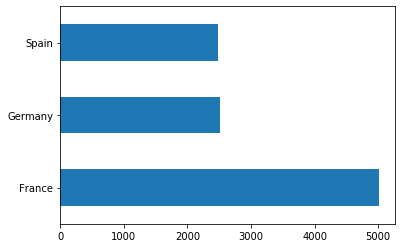

In [6]:
## UNIVARIATE ANALYSIS

df.Geography.value_counts().plot(kind='barh');
df.Geography.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

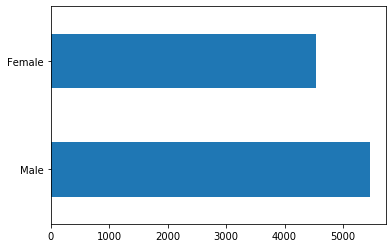

In [7]:
df.Gender.value_counts().plot(kind='barh');
df.Gender.value_counts()

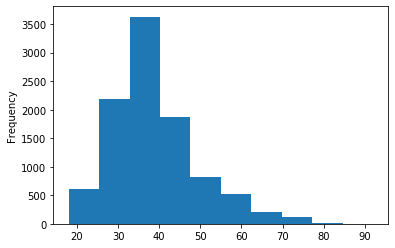

In [8]:
df.Age.describe()
df.Age.plot(kind='hist')

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

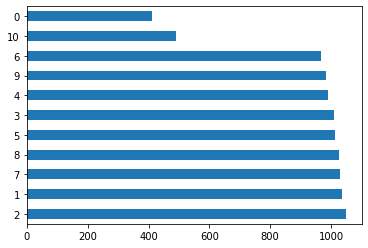

In [9]:
df.Tenure.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Tenure.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

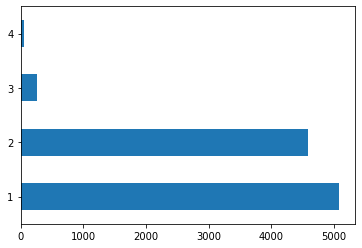

In [10]:
df.NumOfProducts.value_counts().sort_values(ascending=False).plot(kind='barh');
df.NumOfProducts.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

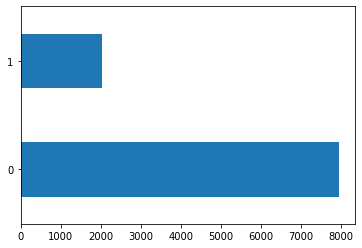

In [11]:
df.Exited.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Exited.value_counts()

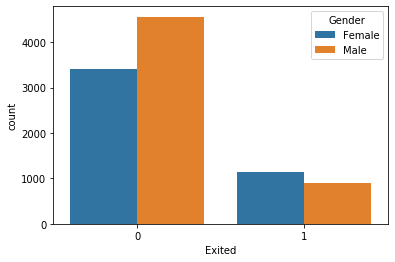

In [12]:

## BI-VARIATE ANALYSIS

sns.countplot(x=df.Exited, hue=df.Gender)

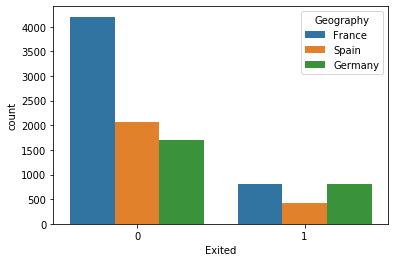

In [13]:
sns.countplot(x=df.Exited, hue=df.Geography)

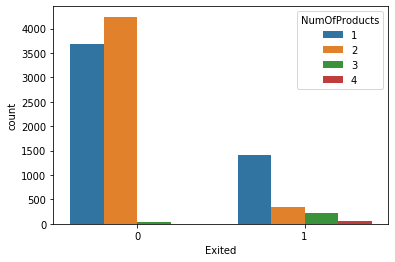

In [14]:
sns.countplot(x=df.Exited, hue=df.NumOfProducts)

<function matplotlib.pyplot.show(*args, **kw)>

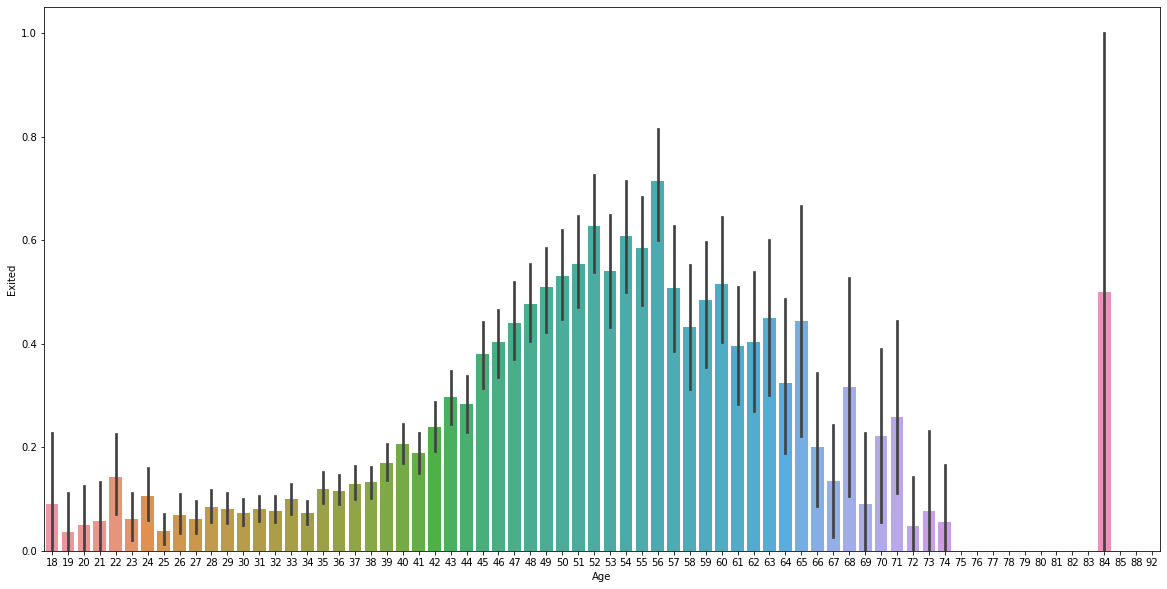

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Age'],y=df['Exited'])
plt.show

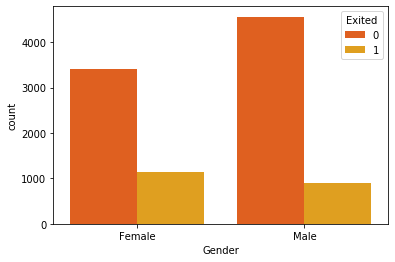

In [41]:
sns.countplot(x="Gender",hue="Exited",data=df,palette="autumn")

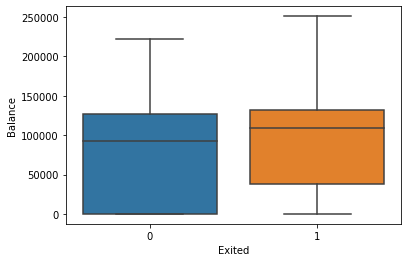

In [42]:
sns.boxplot(x=df.Exited,y=df.Balance)

In [44]:
fig= plt.figure(figsize=(10,5))
sns.histplot(x="Age",hue="Exited",data=df)

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 720x360 with 0 Axes>

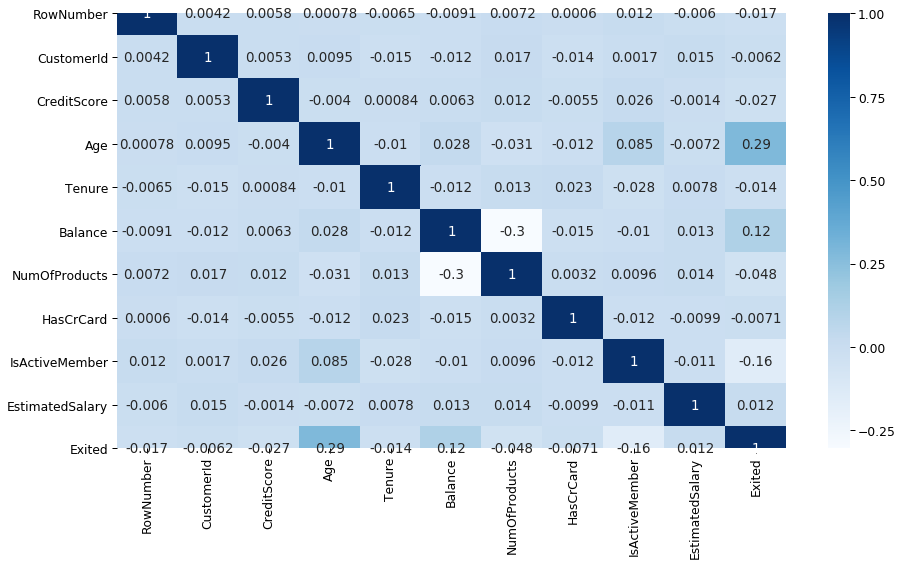

In [45]:
##MULTIVARIATE ANALYSIS


plt.figure(figsize=(15,8))
sns.set_context('paper',font_scale=1.4)

crash_matrix=df.corr()

sns.heatmap(crash_matrix,annot=True,cmap='Blues')

In [46]:
## DESCRIPTIVE STATISTICS

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [47]:
df[df.Exited ==1].Balance.describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

In [48]:
df[df.Exited ==0].Balance.describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [49]:
## Interquartile Range IQR

q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

In [50]:
## Flooring and Capping

iqr = q3 - q1 
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*iqr)
upper_whisker = q3 + (whisker_width*iqr)
df["Age"]=np.where(df["Age"]>upper_whisker,upper_whisker,np.where(df["Age"]<lower_whisker,lower_whisker,df["Age"]))

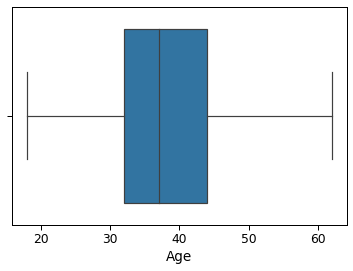

In [51]:
sns.boxplot(df["Age"])

In [52]:
## Encoding of Categorical Values

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [53]:
df["Geography"] = enc.fit_transform(df["Geography"])

In [54]:
df["Gender"] = enc.fit_transform(df["Gender"])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [55]:
## Splitting Data into Dependent and Independent Variables

Independent_Vars = df.drop(["Exited"],axis=1)
Depenendent_Vars = df["Exited"]

Independent_Vars.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [56]:
Depenendent_Vars.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [57]:
## Scale Independent Values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
numerical_data = df.drop(["CustomerId","Surname","RowNumber", "Exited"], axis=1)

In [59]:
numerical_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [60]:
numerical_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']] = scaler.fit_transform(numerical_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
numerical_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.342615,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.240011,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.342615,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.034803,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.445219,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [61]:
## Splitting Data to Test and Train

from sklearn.model_selection import train_test_split

In [62]:
final_df = pd.concat([numerical_data,Depenendent_Vars],axis=1)

final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.342615,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,1.515067,-1.095988,0.240011,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,-0.901886,-1.095988,0.342615,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,-0.901886,-1.095988,0.034803,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,1.515067,-1.095988,0.445219,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(numerical_data, Depenendent_Vars, test_size=0.33, random_state=42)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,1.681053,0.306591,-1.095988,-0.991236,-0.004426,0.473978,-0.911583,-1.547768,-1.030670,1.528261
5027,0.315279,0.306591,0.912419,-0.170405,1.032908,-0.052994,0.807737,0.646092,0.970243,-1.300657
9234,-0.088246,0.306591,0.912419,1.060842,-0.350204,0.708442,-0.911583,0.646092,-1.030670,-1.309740
3944,-0.398649,-0.901886,-1.095988,-0.786028,1.032908,0.665187,-0.911583,0.646092,0.970243,-0.799205
6862,-0.667665,-0.901886,0.912419,-0.580820,1.378686,-1.225848,-0.911583,0.646092,-1.030670,-1.619181


In [38]:

# X_test.head()


In [39]:

# y_train.head()


In [ ]:

# y_test.head()